In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

In [2]:
sns.set()
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
products = pd.read_csv("../data/clean_products.csv")
# products = products.drop(columns=["raw_data", "id", "raw_length"])
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1479 non-null   object
 1   raw_data       1479 non-null   object
 2   raw_length     1479 non-null   int64 
 3   name           1479 non-null   object
 4   size           1479 non-null   object
 5   form           1479 non-null   object
 6   processor      1479 non-null   object
 7   core           1479 non-null   object
 8   frequency      1479 non-null   object
 9   memory         1479 non-null   object
 10  voltage        1479 non-null   object
 11  io             1479 non-null   object
 12  thermal        1479 non-null   object
 13  feature        1479 non-null   object
 14  type           1479 non-null   object
 15  specification  1479 non-null   object
 16  manufacturer   1479 non-null   object
 17  location       1479 non-null   object
 18  description    1479 non-null

In [4]:
# convert values that say `Not available` to np.nan
products = products.replace("Not available", np.nan)
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1479 non-null   object
 1   raw_data       1479 non-null   object
 2   raw_length     1479 non-null   int64 
 3   name           1471 non-null   object
 4   size           1083 non-null   object
 5   form           1080 non-null   object
 6   processor      1358 non-null   object
 7   core           698 non-null    object
 8   frequency      1035 non-null   object
 9   memory         1327 non-null   object
 10  voltage        1304 non-null   object
 11  io             1433 non-null   object
 12  thermal        1149 non-null   object
 13  feature        1462 non-null   object
 14  type           1470 non-null   object
 15  specification  1421 non-null   object
 16  manufacturer   1426 non-null   object
 17  location       373 non-null    object
 18  description    1467 non-null

In [5]:
# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):
        return text.lower()
    return ""

In [6]:
products["name"] = products["name"].apply(preprocess_text)
products["processed_description"] = products["description"].apply(preprocess_text)

In [7]:
# drop products where the name is empty string
products = products[products["name"] != ""]
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1471 entries, 0 to 1478
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1471 non-null   object
 1   raw_data               1471 non-null   object
 2   raw_length             1471 non-null   int64 
 3   name                   1471 non-null   object
 4   size                   1079 non-null   object
 5   form                   1076 non-null   object
 6   processor              1353 non-null   object
 7   core                   697 non-null    object
 8   frequency              1031 non-null   object
 9   memory                 1322 non-null   object
 10  voltage                1300 non-null   object
 11  io                     1426 non-null   object
 12  thermal                1145 non-null   object
 13  feature                1457 non-null   object
 14  type                   1465 non-null   object
 15  specification          141

## Duplicate names

In [8]:
duplicate_products = products[products.duplicated(subset=["name"], keep=False)]
duplicate_products = duplicate_products.sort_values(by="name")

duplicate_products.info()

for name, group in duplicate_products.groupby("name"):
    print(f"Name: {name}")
    for index, row in group.iterrows():
        print(f"Name: {row['name']}, Manufacturer: {row['manufacturer']}, Processor: {row['processor']}, Memory: {row['memory']}, Description: {row['description']}")

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 444 to 618
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     497 non-null    object
 1   raw_data               497 non-null    object
 2   raw_length             497 non-null    int64 
 3   name                   497 non-null    object
 4   size                   383 non-null    object
 5   form                   359 non-null    object
 6   processor              470 non-null    object
 7   core                   238 non-null    object
 8   frequency              389 non-null    object
 9   memory                 468 non-null    object
 10  voltage                451 non-null    object
 11  io                     488 non-null    object
 12  thermal                396 non-null    object
 13  feature                493 non-null    object
 14  type                   497 non-null    object
 15  specification          478

In [9]:
products = products.sort_values("name", ascending=False)
products = products.drop_duplicates("name", keep="first")

In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1133 entries, 8 to 303
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1133 non-null   object
 1   raw_data               1133 non-null   object
 2   raw_length             1133 non-null   int64 
 3   name                   1133 non-null   object
 4   size                   819 non-null    object
 5   form                   834 non-null    object
 6   processor              1028 non-null   object
 7   core                   536 non-null    object
 8   frequency              759 non-null    object
 9   memory                 999 non-null    object
 10  voltage                988 non-null    object
 11  io                     1091 non-null   object
 12  thermal                871 non-null    object
 13  feature                1120 non-null   object
 14  type                   1127 non-null   object
 15  specification          1089

## Clustering

In [22]:
# Import additional libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

In [23]:
# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(products["processed_description"])

In [24]:
# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)

In [25]:
# Function to get similar products
def get_similar_products(idx, cosine_sim=cosine_sim, threshold=0.5):
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [x for x in sim_scores if x[1] > threshold and x[0] != idx]
    return sim_scores

In [26]:
# Create a graph of similar products
G = nx.Graph()
for idx in range(len(products)):
    similar_products = get_similar_products(idx)
    for sim_idx, sim_score in similar_products:
        G.add_edge(idx, sim_idx, weight=sim_score)

<Figure size 2000x2000 with 0 Axes>

Text(0.5, 1.0, 'Product Similarity Network')

(-1.2075036903557141,
 1.1946990270081392,
 -1.2082337234529663,
 1.1914120420526475)

/var/folders/rp/6b0gnlkd7cl_wvl_lj9y8nx40000gn/T/ipykernel_66653/3878195795.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


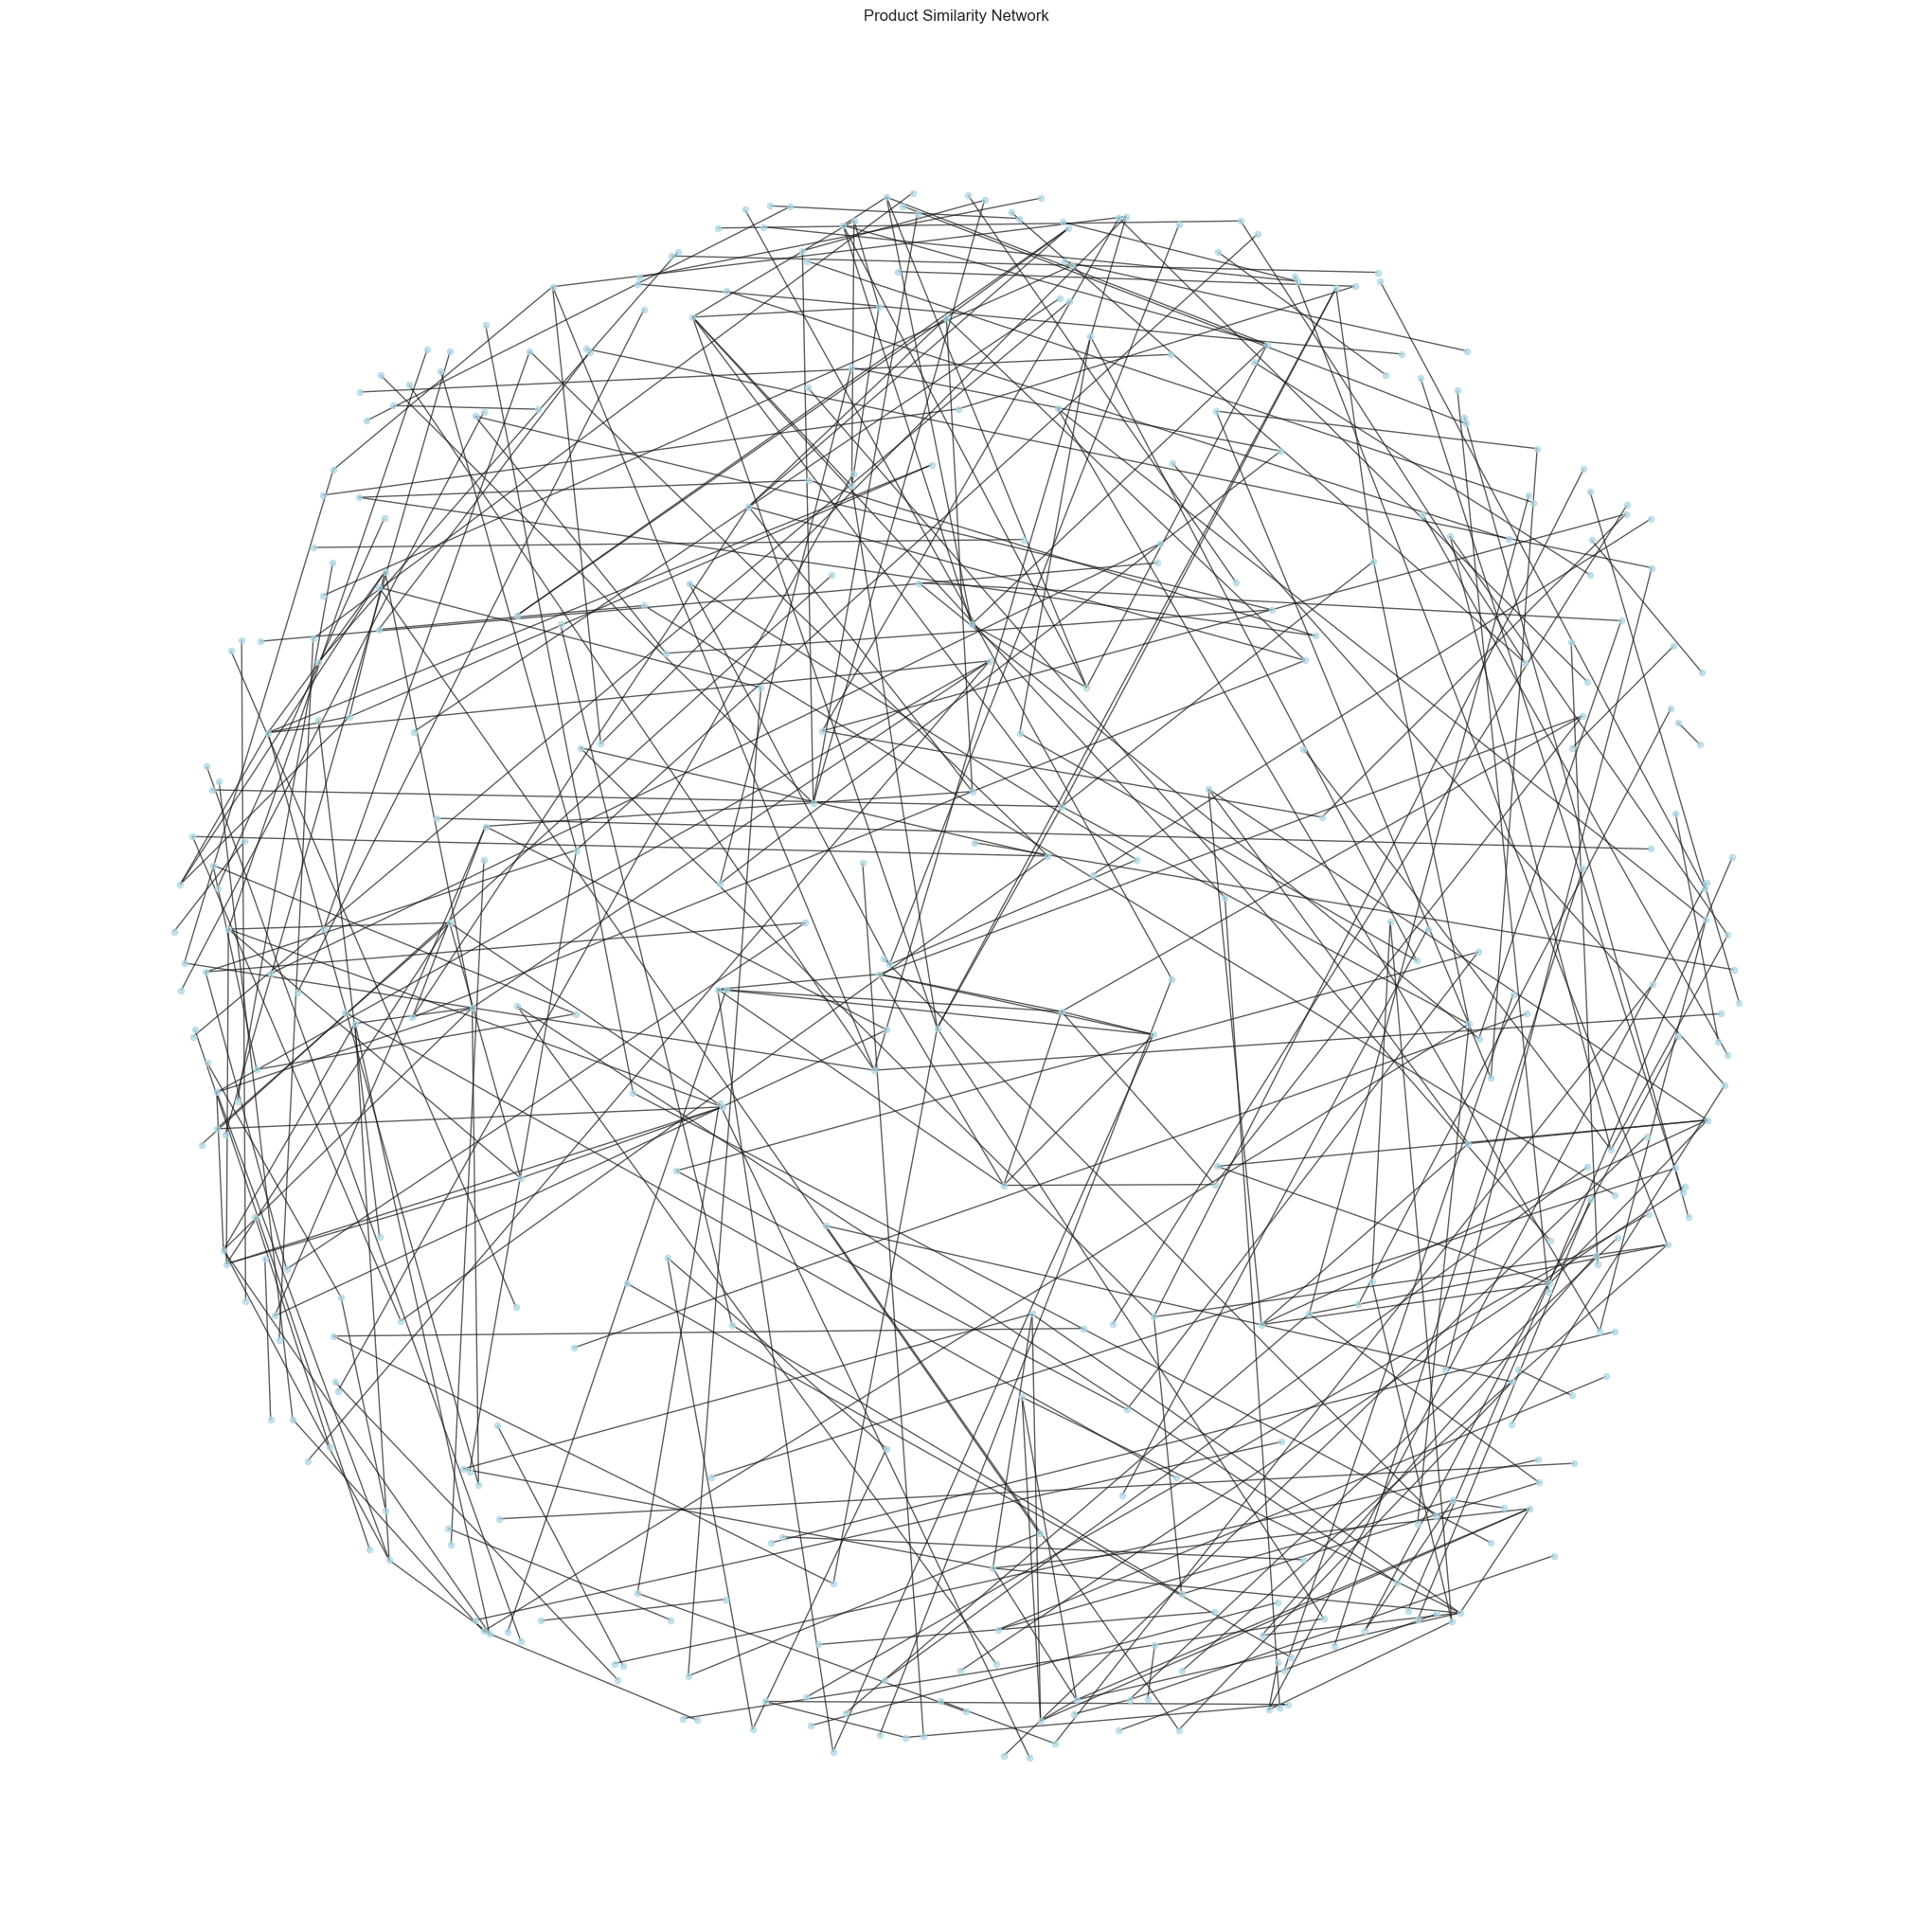

In [27]:
# Visualize the graph
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw(G, pos, node_size=20, node_color="lightblue", with_labels=False, alpha=0.7)
plt.title("Product Similarity Network")
plt.axis("off")
plt.tight_layout()
plt.show()

In [28]:
# Find clusters of similar products
clusters = list(nx.connected_components(G))

# Print information about the clusters
print(f"Number of clusters: {len(clusters)}")
print(f"Sizes of the 5 largest clusters: {sorted([len(c) for c in clusters], reverse=True)[:5]}")

Number of clusters: 128
Sizes of the 5 largest clusters: [22, 18, 14, 10, 10]


In [29]:
# Function to get cluster details
def get_cluster_details(cluster):
    cluster_products = products.iloc[list(cluster)]
    return cluster_products[["name", "manufacturer", "processor", "memory", "description"]].to_dict("records")

In [30]:
# Print details of the largest cluster
largest_cluster = max(clusters, key=len)
print("\nDetails of the largest cluster:")
for product in get_cluster_details(largest_cluster)[:20]:  # Print first 5 products
    print(
        f"Name: {product['name']}, Manufacturer: {product['manufacturer']}, Processor: {product['processor']}, Memory: {product['memory']},, Description: {product['description']}"
    )


Details of the largest cluster:
Name: aimb-qg/ae, Manufacturer: Advantech, Processor: Intel Core i3/i5/i7, Pentium, Memory: Dual Channel DDR3, Max Capacity 32 GB, 4 x 240-pin DIMM,, Description: Industrial motherboard supporting Intel Core i3/i5/i7 and Pentium processors, with dual display, dual GbE LAN, SATA RAID, and various expansion slots.
Name: aimb-q670, Manufacturer: Advantech, Processor: 3rd Generation Intel Core i3/i5/i7, Pentium, Celeron, Memory: Dual Channel DDR3, up to 32 GB,, Description: The AIMB-Q670 is an industrial motherboard designed for high-performance computing with support for 3rd generation Intel Core processors. It features dual display support, dual GbE LAN, SATA RAID, and AMT, making it suitable for a wide range of industrial applications.
Name: aimb-gu-ae, Manufacturer: Advantech, Processor: Intel Core i7/i5/i3, Intel Celeron U, Memory: Dual Channel DDR3L 1600 MHz, Max Capacity 16 GB (8 GB per SODIMM),, Description: The AIMB-GU-AE is an industrial motherboa

<Figure size 1500x1500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Heatmap of Product Similarities (Subset)')

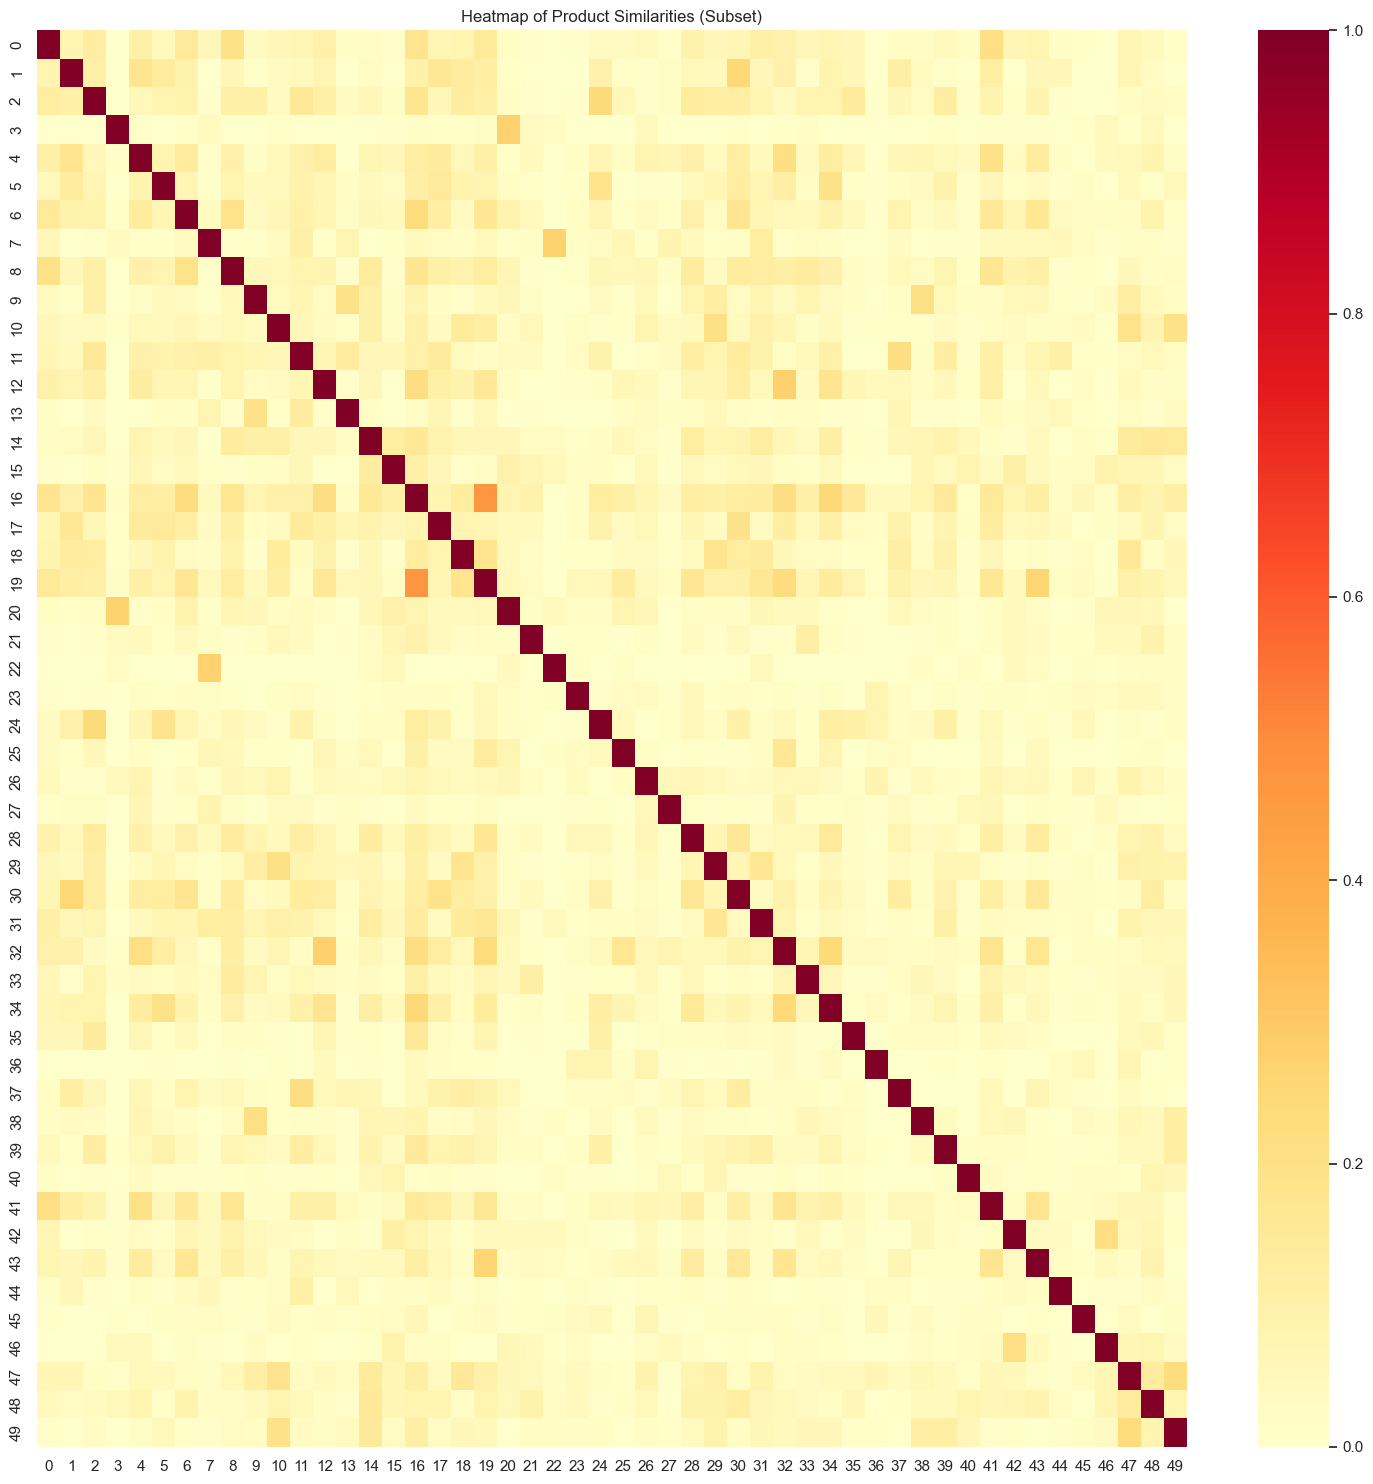

In [31]:
# Heatmap of similarities for a subset of products
subset_size = 50
subset_indices = np.random.choice(len(products), subset_size, replace=False)
subset_sim = cosine_sim[subset_indices][:, subset_indices]

plt.figure(figsize=(15, 15))
sns.heatmap(subset_sim, cmap="YlOrRd")
plt.title("Heatmap of Product Similarities (Subset)")
plt.tight_layout()
plt.show()

In [62]:
# save csv
products.to_csv("../data/filtered_products.csv", index=False)

## Feature Extractions

In [58]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from config import Config
from services.openai_service import OpenAIService
from services.feature_extractor import FeatureExtractor

# Load configuration
config = Config()

openai_service = OpenAIService(config.OPENAI_API_KEY, config)
feature_extraction = FeatureExtractor(openai_service=openai_service)

In [59]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1133 entries, 8 to 303
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1133 non-null   object
 1   raw_data               1133 non-null   object
 2   raw_length             1133 non-null   int64 
 3   name                   1133 non-null   object
 4   size                   819 non-null    object
 5   form                   834 non-null    object
 6   processor              1028 non-null   object
 7   core                   536 non-null    object
 8   frequency              759 non-null    object
 9   memory                 999 non-null    object
 10  voltage                988 non-null    object
 11  io                     1091 non-null   object
 12  thermal                871 non-null    object
 13  feature                1120 non-null   object
 14  type                   1127 non-null   object
 15  specification          1089

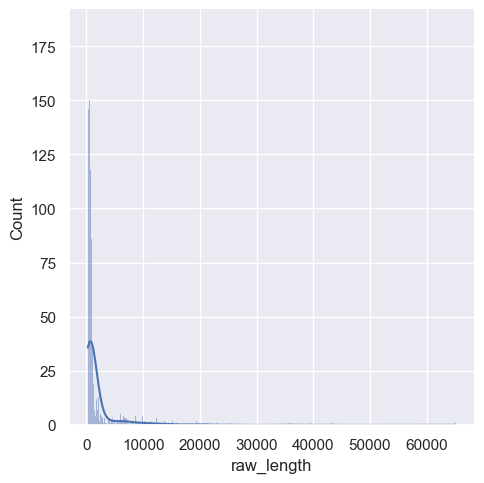

In [33]:
sns.displot(products["raw_length"], kde=True)

In [61]:
products.tail(1).to_dict("records")

[{'id': '114110147',
  'raw_data': 'A Mini PC User Gride afn A Mini PC A Mini PC User Guide Notice Packing List Product Introduction Brief Specifications Install Dimension Interfaces Jetpack KEY FEATURES IN JETPACK Sample Applications Develop Tool Notice Please read manual carefully install operate transport device Ensure correct power range used powering device Avoid hot plugging To properly turn power please shut Ubuntu system first cut power Due particularity Ubuntu system Nvidia developer kit power turned startup completed probability abnormality cause device fail start Due use Ubuntu system problem also exists device Do use cables connectors described manual Do use device near strong magnetic fields Backup data transportation device idle Recommend transport device original packaging Packing List A mini PCx Antenna x Power adapterWithout Power cord x afn Processor NVIDIA Jetson Xavier NX AI Performance TOPS INT GPU core NVIDIA Volta GPU Tensor Cores GPU Max Freq MHz A Mini PC Produ

In [47]:
products.head(1)["raw_data"].values[0]

'ZWIRx Programming Guide ZWIRx Programming Guide Integrated Device Technology Inc April Content Introduction IPv LoWPAN Organization Document Functional Description Requirements Notation Terms Naming Conventions Library Architecture Operating Modes Device Mode Gateway Mode Sniffer Mode Operating System Initialization Normal Operation Power Modes Error Handling Firmware Version Information Vendor ID Product ID Major Firmware Version Minor Firmware Version Firmware Version Extension Library Version Addressing Address Types IPv Addresses IPv Address Autoconfiguration Validation Address Uniqueness Data Transmission Reception User Datagram Protocol Data Transmission Reception Address Resolution Recommendations Mesh Routing Multicast Traffic Unicast Traffic Mesh Routing Parameter Configuration Recommendations Network Device Status ZWIRx Programming Guide Integrated Device Technology Inc April Security Internet Protocol Security IPSec Internet Key Exchange Version IKEv Recommendations Firmwar

In [60]:
result, input_tokens, output_tokens = await feature_extraction.extract_data(text=products.head(1)["raw_data"].values[0])
print(f"Input tokens: {input_tokens}, Output tokens: {output_tokens}")
result

INFO:services.openai_service:===> Using model: gpt-4o


INFO:services.openai_service:Input token count: 30243
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:services.openai_service:Output token count: 250


Input tokens: 30243, Output tokens: 250


'```json\n{\n    "name": "ZWIRx Programming Guide",\n    "size": "Not available",\n    "form": "Not available",\n    "processor": "ARM Cortex M3",\n    "core": "Not available",\n    "frequency": "72 MHz",\n    "memory": "128 kByte flash memory, 16 kByte RAM",\n    "voltage": "Not available",\n    "io": "Not available",\n    "thermal": "Not available",\n    "feature": "Provides bidirectional IPv6 communication over IEEE 802.15.4 wireless network",\n    "type": "Programming Guide",\n    "specification": "Not available",\n    "manufacturer": "Integrated Device Technology Inc",\n    "location": "Not available",\n    "description": "This guide describes the usage of the LoWPAN application programming interface (API) for application development using ZWIRx modules. These modules provide bidirectional IPv6 communication over an IEEE 802.15.4 wireless network.",\n    "summary": "ZWIRx Programming Guide by Integrated Device Technology Inc, detailing the usage of LoWPAN API for bidirectional IPv

In [57]:
result

'```json\n{\n    "name": "ZWIRx Programming Guide",\n    "size": "Not available",\n    "form": "Not available",\n    "processor": "ARM Cortex M3",\n    "core": "Not available",\n    "frequency": "72 MHz",\n    "memory": "128 kByte flash memory, 16 kByte RAM",\n    "voltage": "Not available",\n    "io": "Not available",\n    "thermal": "Not available",\n    "feature": "LoWPAN application programming interface, IPv6 communication, IEEE 802.15.4 wireless network, mesh topology support, power-saving modes, firmware over-the-air updates",\n    "type": "Programming Guide",\n    "specification": "Not available",\n    "manufacturer": "Integrated Device Technology Inc",\n    "location": "Not available",\n    "description": "This guide describes the usage of the LoWPAN application programming interface (API) for application development using ZWIRx modules. These modules provide bidirectional IPv6 communication over an IEEE 802.15.4 wireless network.",\n    "summary": "ZWIRx Programming Guide by 